In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   


In [3]:
sports=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')  
sports.columns  

Index(['edition', 'start_date', 'winner_name', 'winner_team', 'distance',
       'time_overall', 'time_margin', 'stage_wins', 'stages_led', 'height',
       'weight', 'age', 'born', 'died', 'full_name', 'nickname', 'birth_town',
       'birth_country', 'nationality'],
      dtype='object')

In [4]:
sports.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [5]:
sports.isnull().sum()

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      8
time_margin       8
stage_wins        0
stages_led        0
height           40
weight           39
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64

In [6]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

In [14]:
# Fill missing values in 'height', 'weight', and 'died' columns with the mode
sports['height'].fillna(sports['height'].mode()[0], inplace=True)
sports['weight'].fillna(sports['weight'].mode()[0], inplace=True)
sports['died'].fillna(sports['died'].mode()[0], inplace=True)
sports['time_overall'].fillna(sports['time_overall'].mode()[0], inplace=True)
sports['time_margin'].fillna(sports['time_margin'].mode()[0], inplace=True)

# Replace missing values in 'full_name' and 'nickname' columns with 'name not shared'
sports['full_name'].fillna('name not shared', inplace=True)
sports['nickname'].fillna('name not shared', inplace=True)

# Display the updated dataframe
sports.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\1230890386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sports['height'].fillna(sports['height'].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\1230890386.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,name not shared,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,1.77,75.0,19,1884-08-04,1941-03-18,name not shared,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,82.086667,0.067778,5,10,1.77,75.0,24,1881-06-29,1939-04-24,name not shared,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,82.086667,0.067778,5,12,1.77,75.0,27,1879-06-05,1907-01-25,name not shared,name not shared,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,82.086667,0.067778,2,5,1.77,75.0,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [15]:
sports.isnull().sum()

edition          0
start_date       0
winner_name      0
winner_team      0
distance         0
time_overall     0
time_margin      0
stage_wins       0
stages_led       0
height           0
weight           0
age              0
born             0
died             0
full_name        0
nickname         0
birth_town       0
birth_country    0
nationality      0
dtype: int64

2. Winning Time Trends
✅ Extract winning times and runner-up times for each edition.
✅ Calculate the time gap between the winner and runner-up.
✅ Visualize trends over time (line chart).
✅ Add insights: Are winning times getting faster or slower?

C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\3367042199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winning_times['runner_up_time'] = winning_times['time_overall'] + winning_times['time_margin']


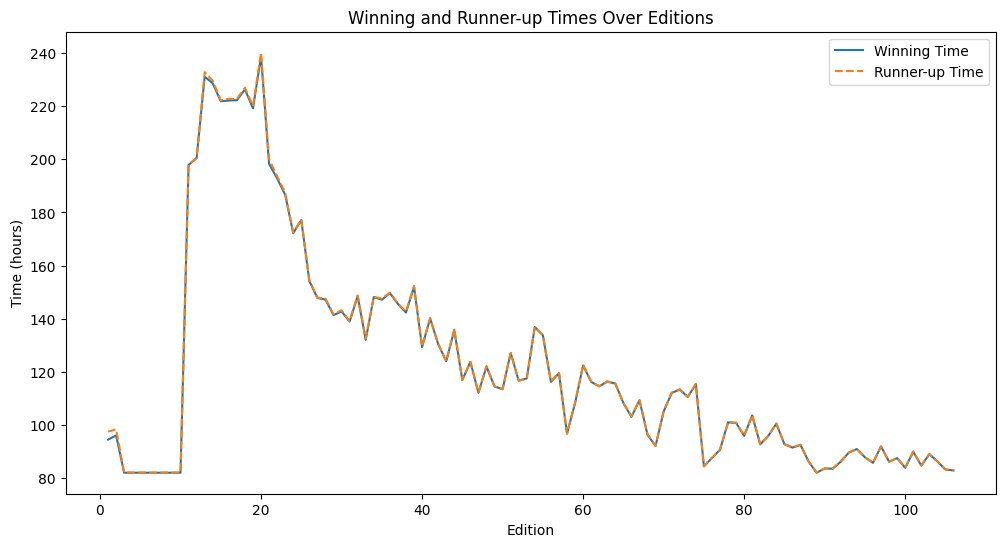

In [16]:
# Extract winning times and runner-up times for each edition
winning_times = sports[['edition', 'time_overall', 'time_margin']]

# Calculate the time gap between the winner and runner-up
winning_times['runner_up_time'] = winning_times['time_overall'] + winning_times['time_margin']

# Visualize trends over time (line chart)
plt.figure(figsize=(12, 6))
plt.plot(winning_times['edition'], winning_times['time_overall'], label='Winning Time')
plt.plot(winning_times['edition'], winning_times['runner_up_time'], label='Runner-up Time', linestyle='--')
plt.xlabel('Edition')
plt.ylabel('Time (hours)')
plt.title('Winning and Runner-up Times Over Editions')
plt.legend()
plt.show()



In [17]:
#  insights
winning_time_trend = np.polyfit(winning_times['edition'], winning_times['time_overall'], 1)
runner_up_time_trend = np.polyfit(winning_times['edition'], winning_times['runner_up_time'], 1)

print(f"Winning time trend: {'decreasing' if winning_time_trend[0] < 0 else 'increasing'}")
print(f"Runner-up time trend: {'decreasing' if runner_up_time_trend[0] < 0 else 'increasing'}")

Winning time trend: decreasing
Runner-up time trend: decreasing


Step 3: Performance by Stage Type (Box Plot Analysis)
✅ Extract columns: stage_wins, stages_led, age, winner_name
✅ Group winners by total stage_wins per edition
✅ Create a box plot:

X-axis: Stage wins
Y-axis: Distribution of winning times (time_overall)
✅ Insights:
Which type of stage (mountain, flat, time trial) has the most variation?
Do some winners dominate in certain types of stages?

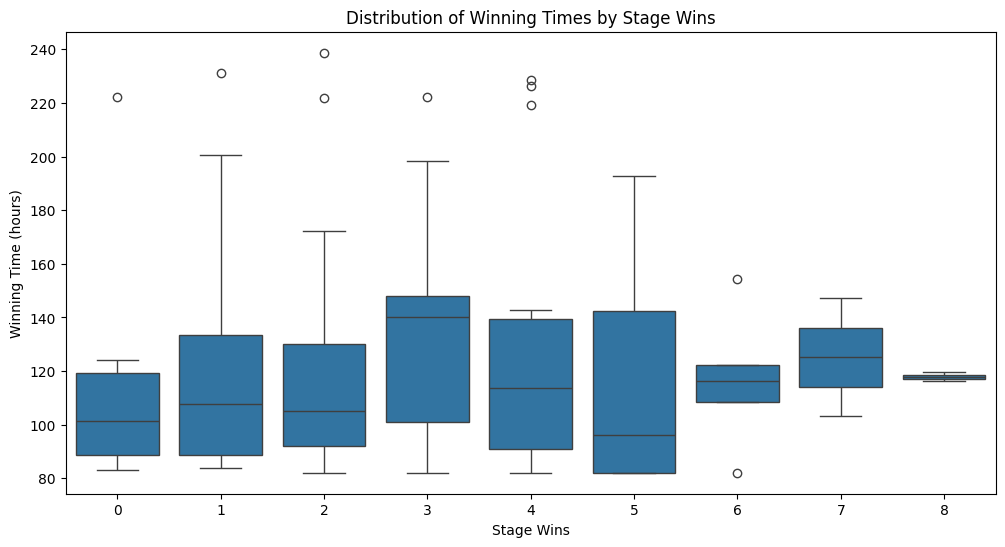

In [18]:
# Extract relevant columns
stage_performance = sports[['stage_wins', 'time_overall', 'winner_name']]

# Group by total stage wins per edition
grouped_stage_performance = stage_performance.groupby('stage_wins')['time_overall'].describe()

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='stage_wins', y='time_overall', data=stage_performance)
plt.xlabel('Stage Wins')
plt.ylabel('Winning Time (hours)')
plt.title('Distribution of Winning Times by Stage Wins')
plt.show()

In [19]:
grouped_stage_performance

,count,mean,std,min,25%,50%,75%,max
stage_wins,,,,,,,,
0,8.0,115.696076,45.746341,82.950000,88.842778,101.433611,119.184653,222.135000
1,22.0,123.352576,45.032830,83.686667,88.662639,107.859861,133.617708,231.120833
2,26.0,117.763494,40.096712,82.086667,92.180556,105.171389,130.215486,238.740278
3,17.0,132.566176,38.664038,82.086667,100.825000,140.101389,147.860278,222.258333
4,15.0,128.743593,53.246260,82.086667,90.761389,113.501389,139.268611,228.603611
5,9.0,113.928642,39.923601,82.086667,82.086667,96.327222,142.337222,192.816111
6,5.0,116.653056,26.018380,82.086667,108.288333,116.267222,122.426111,154.196944
7,2.0,125.145278,31.157089,103.113889,114.129583,125.145278,136.160972,147.176667
8,2.0,117.906528,2.296329,116.282778,117.094653,117.906528,118.718403,119.530278
